Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************

2024-06-18 23:32:19.623 | INFO     | alchemlyb.workflows.base:__init__:50 - Alchemlyb Version: f2.1.0
2024-06-18 23:32:19.623 | INFO     | alchemlyb.workflows.base:__init__:51 - Set Temperatu

<Axes: xlabel='Fraction of the simulation time', ylabel='$\\Delta G$ (kJ/mol)'>

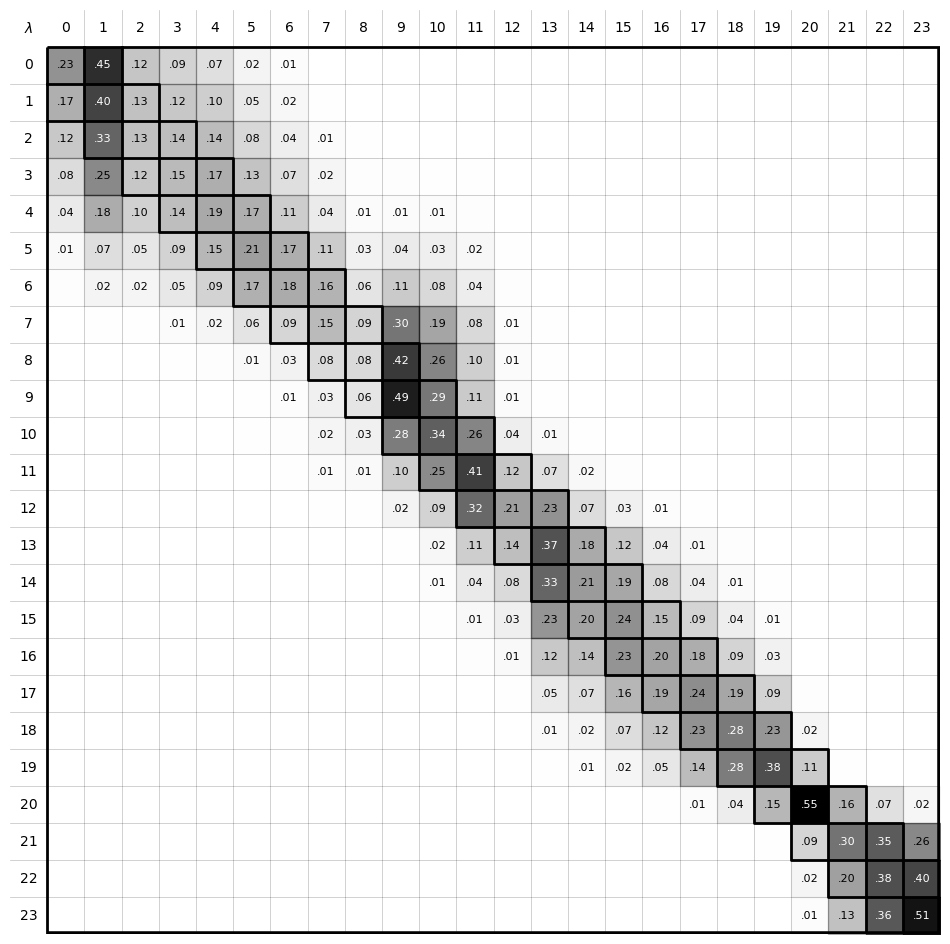

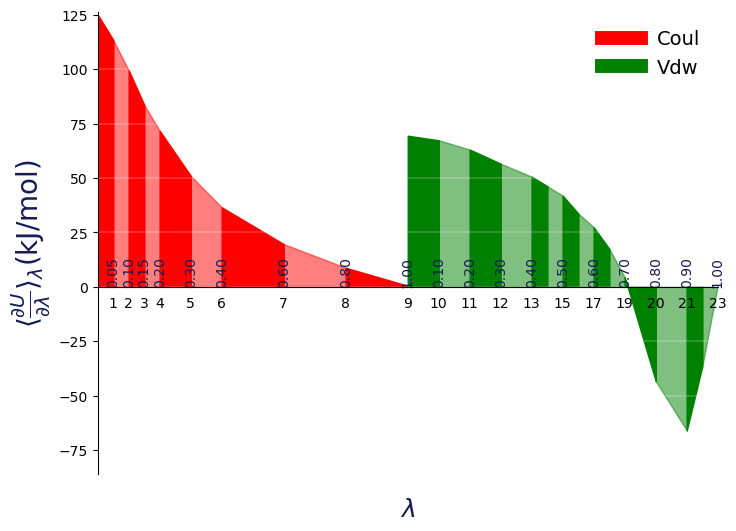

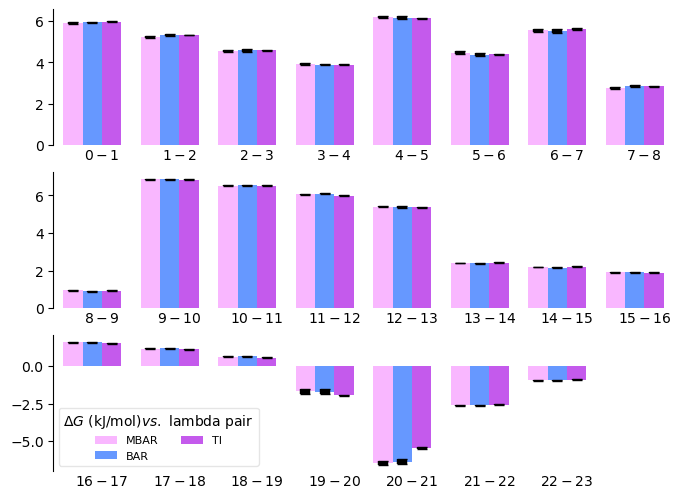

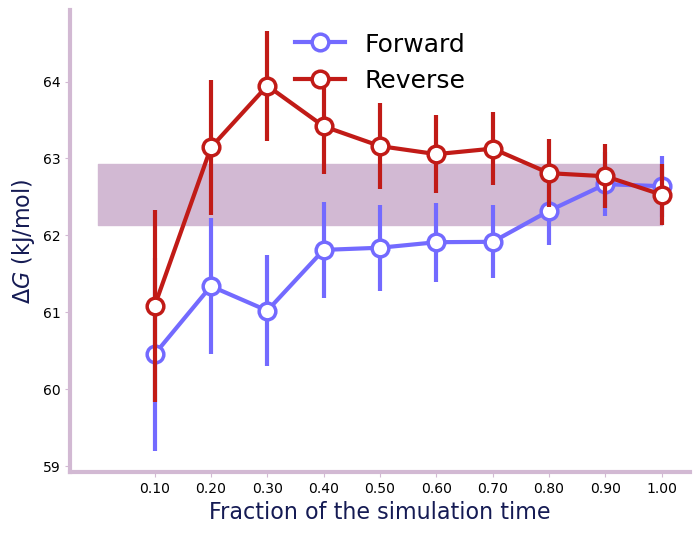

In [2]:
from alchemlyb.workflows import ABFE
import os
sys = '20'
dir = '/Users/estebancea/Library/CloudStorage/OneDrive-Personal/Doctorado/00_Trabajo/20_SAC/12_free_energy/MD/' + sys + '/xvg_files'
# Load the data
workflow = ABFE(software='GROMACS', dir=dir,
                 prefix='prd', suffix='xvg', T=303.2, outdirectory='./')
# Set the unit.
workflow.update_units('kJ/mol')
# Read the data
workflow.read()
# Decorrelate the data.
workflow.preprocess(skiptime=16000, uncorr='dhdl', threshold=50)
# Run the estimator
workflow.estimate(estimators=("MBAR", "BAR", "TI"))
# Retrieve the result
summary = workflow.generate_result()
# Plot the overlap matrix
workflow.plot_overlap_matrix(overlap='O_MBAR_' + sys + '.pdf')
# Plot the dHdl for TI
workflow.plot_ti_dhdl(dhdl_TI='dhdl_TI_' + sys + '.pdf')
# Plot the dF states
workflow.plot_dF_state(dF_state='dF_state_' + sys + '.pdf')
# Convergence analysis
workflow.check_convergence(10, dF_t='dF_t_' + sys + '.pdf')

In [1]:
5*0.2

1.0